# 1-2-Assembly analysis
Manuel Jara-Espejo$^{1}$

Aboobaker lab, Department of Biology, University of Oxford

## Contents of notebook

1. Introduction 
2. Identify Gaps
3. Run Assembly statistics
4. Run busco
5. Compare gap prevalence in Phaw5.0 and Phaw5.1

## 1 Introduction

## 2. Identify gaps

In [1]:
%%bash

cd ./scripts
less 4_IdentifyGaps.sh

#See gaps identified in Phaw5.0
head /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed

echo ""

#See gaps identified in Phaw5.1
head /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.bed

#Commands used to identify gaps in Phaw5.0 and Phaw5.1 assemblies
##Command source: scaffoldgap2bed.py {genome} (https://github.com/lexnederbragt/sequencetools)

##Run command on Phaw5.0
nohup python3 /PATH/scaffoldgap2bed.py -i /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa -m 10 > parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed &

##Run command on Phaw5.1
nohup python3 /PATH/scaffoldgap2bed.py -i /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa -m 10 > phaw_sambaAsm.scaff_seqs_editedScafNames.bed &

Scaffold_2;HRSCAF=42	1275	3240	gap
Scaffold_2;HRSCAF=42	3413	3513	gap
Scaffold_3;HRSCAF=66	7071	7908	gap
Scaffold_3;HRSCAF=66	8089	8189	gap
Scaffold_7;HRSCAF=96	994	2691	gap
Scaffold_7;HRSCAF=96	2823	2923	gap
Scaffold_8;HRSCAF=132	9503	9952	gap
Scaffold_8;HRSCAF=132	11420	14944	gap
Scaffold_8;HRSCAF=132	15854	16800	gap
Scaffold_8

## 3. Run Assembly statistics

In [3]:
%%bash

cd ./scripts
less 5_run_assembly_stats.sh

#!/bin/bash 

#Commands used to obtain assembly statistics for Phaw5.0 and Phaw 5.1, including the intermediat assemblies generated

##Run on reference assembly Phaw 5.0
assembly-stats -t  /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa > parhyale_hawaiensis_15Feb20182_1IWOV.fa.fa_stats

#Run on assembly after filling Phaw5.0 using Samba
assembly-stats  -t /drives/ssd1/manuel/phaw/2022_analysis/asm_SAMBA_analysis/parhyale_hawaiensis_15Feb20182_1IWOV.fa.scaffolds.fa  > /drives/ssd1/manuel/phaw/2022_analysis/asm_SAMBA_analysis/parhyale_hawaiensis_15Feb20182_1IWOV.fa.scaffolds.fa

#Run on assembly after filling Phaw5.0 using TGS-Gap-Closer
assembly-stats  -t /drives/raid/AboobakerLab/manuel/data_phaw_analysis/asm_gap_filling/TGS-GapCloser_anlysis/wholeGenome_analysis/phaw_fullASm.scaff_seqs  > phaw_fullASm.scaff_seqs_stats

##Run on updated assembly (Phaw5.1) after filling Phaw5.0 using Samba + TGS-Gap-Closer
assembly-stats -t  /d

### Print phaw5.0 stats

In [12]:
import pandas as pd

asm_stats_phaw5_0 = pd.read_table("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.fa_stats", sep="\t", header = 0)
asm_stats_phaw5_0.transpose()

,0
filename,/drives/raid/AboobakerLab/manuel/data_phaw_ana...
total_length,2755851339
number,283876
mean_length,9707.94
longest,111408412
shortest,200
N_count,558775491
Gaps,408799
N50,53694927
N50n,19


### Print phaw5.1 stats

In [10]:
asm_stats_phaw5_1 = pd.read_table("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_stats", sep="\t", header = 0)
asm_stats_phaw5_1.transpose()

,0
filename,/drives/raid/AboobakerLab/manuel/data_phaw_ana...
total_length,2823710058
number,280585
mean_length,10063.65
longest,114006073
shortest,199
N_count,92739792
Gaps,108574
N50,54784699
N50n,20


## 4. Run busco

In [7]:
%%bash

cd ./scripts
less 6_run_busco.sh

#!/bin/bash 

#Script to run busco analysis on phaw genome assembly

#Run busco on Phaw 5.0

if [ "$1" == "ref_assembly" ]; then

busco -i /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa -l arthropoda_odb10 --mode genome --cpu 16 -f --augustus -o ./busco_results_phaw5.0 

fi

#Run busco on Phaw 5.1
if [ "$1" == "gappfilled_assembly" ]; then

busco -i /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa -l arthropoda_odb10 --mode genome --cpu 16 -f --augustus -o ./busco_results_phaw5.1

fi


### Print busco results - Phaw5.0 assembly

In [15]:
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/busco_analysis/busco_results_phaw5.0/short_summary.specific.arthropoda_odb10.busco_results_phaw5.0.txt

# BUSCO version is: 5.3.2 
# The lineage dataset is: arthropoda_odb10 (Creation date: 2020-09-10, number of genomes: 90, number of BUSCOs: 1013)
# Summarized benchmarking in BUSCO notation for file /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa
# BUSCO was run in mode: genome
# Gene predictor used: augustus

	***** Results: *****

	C:90.0%[S:88.2%,D:1.8%],F:3.1%,M:6.9%,n:1013	   
	911	Complete BUSCOs (C)			   
	893	Complete and single-copy BUSCOs (S)	   
	18	Complete and duplicated BUSCOs (D)	   
	31	Fragmented BUSCOs (F)			   
	71	Missing BUSCOs (M)			   
	1013	Total BUSCO groups searched		   

Dependencies and versions:
	hmmsearch: 3.1
	makeblastdb: 2.11.0+
	tblastn: 2.11.0+
	augustus: 3.4.0
	gff2gbSmallDNA.pl: None
	new_species.pl: None
	etraining: None


### Print busco results - Phaw5.1 assembly

In [16]:
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/busco_analysis/busco_results_phaw5.1/short_summary.specific.arthropoda_odb10.busco_results_phaw5.1.txt

# BUSCO version is: 5.3.2 
# The lineage dataset is: arthropoda_odb10 (Creation date: 2020-09-10, number of genomes: 90, number of BUSCOs: 1013)
# Summarized benchmarking in BUSCO notation for file /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa
# BUSCO was run in mode: genome
# Gene predictor used: augustus

	***** Results: *****

	C:90.0%[S:85.9%,D:4.1%],F:3.5%,M:6.5%,n:1013	   
	912	Complete BUSCOs (C)			   
	870	Complete and single-copy BUSCOs (S)	   
	42	Complete and duplicated BUSCOs (D)	   
	35	Fragmented BUSCOs (F)			   
	66	Missing BUSCOs (M)			   
	1013	Total BUSCO groups searched		   

Dependencies and versions:
	hmmsearch: 3.1
	makeblastdb: 2.11.0+
	tblastn: 2.11.0+
	augustus: 3.4.0
	gff2gbSmallDNA.pl: None
	new_species.pl: None
	etraining: None


## 5. Compare gap prevalence in Phaw5.0 and Phaw5.1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import collections
import numpy as np

#### Load files containing gap information for both, original 0 and gapfilled, assemblies

In [2]:
#Phaw5.0 - Reference assembly gap information
phaw_RefAsm_gaps = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed",sep='\t',header=None)
phaw_RefAsm_gaps = phaw_RefAsm_gaps.assign(gap_len = phaw_RefAsm_gaps.iloc[:, 2] - phaw_RefAsm_gaps.iloc[:, 1] + 1)

#Phaw5.1 - Samba + TGSgapcloser Gap-filled assembly gap information
samba_gapFilled_asm = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs.bed",sep='\t',header=None)
samba_gapFilled_asm = samba_gapFilled_asm.assign(gap_len = samba_gapFilled_asm.iloc[:, 2] - samba_gapFilled_asm.iloc[:, 1] + 1)

#### Plot Gap frequency vs gap length in Phaw5.0

Number of Gaps: 333096


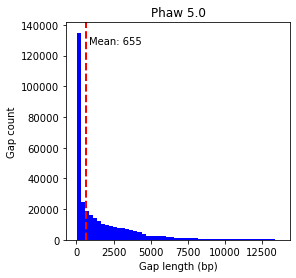

In [5]:
plt.figure(figsize=(4,4))
plt.hist(phaw_RefAsm_gaps['gap_len'],bins=50,color='blue')#,title = "Current assembly").ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title("Phaw 5.0")
plt.axvline(phaw_RefAsm_gaps['gap_len'].median(),color='red', ls='--', lw=2)
plt.xlabel('Gap length (bp)')
plt.ylabel('Gap count')

min_ylim, max_ylim = plt.ylim()
plt.text(phaw_RefAsm_gaps['gap_len'].median()*1.3,max_ylim*0.9,'Mean: {:.0f}'.format(phaw_RefAsm_gaps['gap_len'].median()))

print("Number of Gaps: " + str(phaw_RefAsm_gaps.shape[0]))
#filename = 'gapLength_phaw5.0'
#plt.savefig('gapLength_phaw5.0.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

#### Plot Gap frequency vs gap length in Phaw5.1

Number of Gaps: 93643


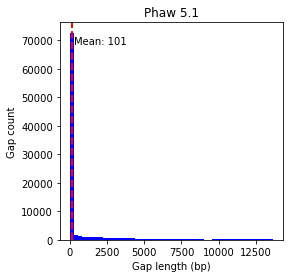

In [10]:
plt.figure(figsize=(4,4))
plt.hist(samba_gapFilled_asm['gap_len'],bins=50,color='blue')#,title = "Current assembly").ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title("Phaw 5.1")
plt.axvline(samba_gapFilled_asm['gap_len'].median(),color='red', ls='--', lw=2)
plt.xlabel('Gap length (bp)')
plt.ylabel('Gap count')

min_ylim, max_ylim = plt.ylim()
plt.text(samba_gapFilled_asm['gap_len'].median()*2.9,max_ylim*0.9,'Mean: {:.0f}'.format(samba_gapFilled_asm['gap_len'].median()))

print("Number of Gaps: " + str(samba_gapFilled_asm.shape[0]))
#plt.savefig('gapLength_phaw5.1.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

## 6. Compare gap prevalence in Phaw5.0 and Phaw5.1

#### Analyse N prevalence in Phaw5.1 assembly

In [75]:
%%bash
#Count Ns per scaffold in PHAW5.1 assembly. REmove header and last line(total genome size)
#/drives/raid/AboobakerLab/software/faCount \
#/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa | cut -f1,2,7 | tail -n +2 | head -n -1 > phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt

echo -e "Scaffold\tlength\tNs_perScaf\tN_fraction"
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt | sort -k2,2gr |head -10

Scaffold	length	Ns_perScaf	N_fraction
Scaffold_135_HRSCAF_924	114006073	2971409
Scaffold_283869_HRSCAF_291705	100614917	2605681
Scaffold_N3	95645562	2788166
Scaffold_N6	91876534	2737545
Scaffold_7301_HRSCAF_10348	80374539	2302407
Scaffold_283828_HRSCAF_291664	77447951	2293922
Scaffold_203_HRSCAF_1201	77231641	1775088
Scaffold_283867_HRSCAF_291703	73492129	1820546
Scaffold_283817_HRSCAF_291653	71549015	1961417
Scaffold_N2064	68717620	1587650


In [21]:
#Open dataframe containing gap information
NsbyScaffphaw5_1= pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt",sep='\t',header=None)
NsbyScaffphaw5_1["N_perc"] = (NsbyScaffphaw5_1[2]/NsbyScaffphaw5_1[1])*100
NsbyScaffphaw5_1["Seq_perc"] = 100 - NsbyScaffphaw5_1["N_perc"]
NsbyScaffphaw5_1 = NsbyScaffphaw5_1.sort_values(1,ascending=False).rename(columns={0:'scaffold_id'}).reset_index()
NsbyScaffphaw5_1 # = NsbyScaffphaw5_1.reset_index().drop("index", axis=1)

,index,scaffold_id,1,2,N_perc,Seq_perc
0,193893,Scaffold_135_HRSCAF_924,114006073,2971409,2.606360,97.393640
1,257237,Scaffold_283869_HRSCAF_291705,100614917,2605681,2.589756,97.410244
2,2,Scaffold_N3,95645562,2788166,2.915102,97.084898
3,5,Scaffold_N6,91876534,2737545,2.979591,97.020409
4,268140,Scaffold_7301_HRSCAF_10348,80374539,2302407,2.864597,97.135403
...,...,...,...,...,...,...
280580,261835,Scaffold_282095_HRSCAF_286111,200,0,0.000000,100.000000
280581,78418,Scaffold_282132_HRSCAF_286148,200,0,0.000000,100.000000
280582,206353,Scaffold_282065_HRSCAF_286081,200,0,0.000000,100.000000
280583,154769,Scaffold_136897_HRSCAF_140911,199,0,0.000000,100.000000


In [22]:
#Edit dataframe to select only top 100 scaffols and collapse the rest
NsbyScaffphaw5_1.loc['mean']= NsbyScaffphaw5_1[100:].mean() #Averaging rows
NsbyScaffphaw5_1 = NsbyScaffphaw5_1.fillna('avg_scaffold')
NsbyScaffphaw5_1 = NsbyScaffphaw5_1.drop(NsbyScaffphaw5_1.iloc[100:280585].index,inplace=False)
NsbyScaffphaw5_1

<ipython-input-22-01c1699d16fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NsbyScaffphaw5_1.loc['mean']= NsbyScaffphaw5_1[100:].mean() #Averaging rows


,index,scaffold_id,1,2,N_perc,Seq_perc
0,193893.000000,Scaffold_135_HRSCAF_924,1.140061e+08,2.971409e+06,2.606360,97.393640
1,257237.000000,Scaffold_283869_HRSCAF_291705,1.006149e+08,2.605681e+06,2.589756,97.410244
2,2.000000,Scaffold_N3,9.564556e+07,2.788166e+06,2.915102,97.084898
3,5.000000,Scaffold_N6,9.187653e+07,2.737545e+06,2.979591,97.020409
4,268140.000000,Scaffold_7301_HRSCAF_10348,8.037454e+07,2.302407e+06,2.864597,97.135403
...,...,...,...,...,...,...
96,197720.000000,Scaffold_283800_HRSCAF_291571,2.149020e+05,1.448300e+04,6.739351,93.260649
97,143712.000000,Scaffold_401_HRSCAF_1730,2.140710e+05,1.161800e+04,5.427171,94.572829
98,107854.000000,Scaffold_12157_HRSCAF_15513,2.134010e+05,3.676000e+03,1.722579,98.277421
99,151575.000000,Scaffold_283758_HRSCAF_291462,2.128460e+05,1.018000e+04,4.782801,95.217199


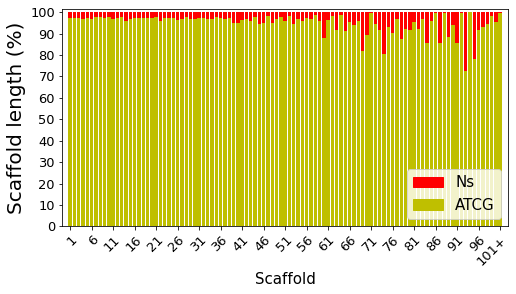

In [25]:
#PLot N_percentage per sacffold in Phaw5.1 assembly

plt.figure(figsize=(8,4))
#data_for_barplot.plot(x="scaffold_id",kind="bar",stacked=True,figsize=(10, 8))

plt.bar(NsbyScaffphaw5_1["scaffold_id"],NsbyScaffphaw5_1["Seq_perc"], color='y')
plt.bar(NsbyScaffphaw5_1["scaffold_id"],NsbyScaffphaw5_1["N_perc"], color='r',bottom=NsbyScaffphaw5_1["Seq_perc"])

scaffold_order = np.arange(1, 102)

plt.xticks(NsbyScaffphaw5_1["scaffold_id"],list(np.append(scaffold_order[:-1],'101+')),rotation=45,fontsize =13,
           horizontalalignment="right",rotation_mode='anchor')
#plt.xticks(data_for_barplot["scaffold_id"][100:101],"101+",rotation=45, horizontalalignment="right",rotation_mode='anchor')
plt.yticks(list(range(0,200,10)),rotation=0,fontsize =13, horizontalalignment="right",rotation_mode='anchor')
plt.locator_params(axis='x', nbins=21)
plt.ylabel("Scaffold length (%)",fontsize=20)
plt.xlabel('Scaffold',fontsize=15)
colors = {'Ns':'red', 'ATCG':'y'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc=4,prop={'size': 15})
plt.margins(x=0.015,y=0.015, tight=True)

#plt.savefig("NsbyScaff_phaw5.1.jpg", dpi=300,bbox_inches = 'tight')
plt.show()

#### Analyse N prevalence in Phaw5.0 assembly

In [28]:
%%bash

#Run N prevalence in Phaw5.0 assembly

#Count Ns per scaffold in PHAW5.1 assembly. REmove header and last line(total genome size)
#/drives/raid/AboobakerLab/software/faCount \
#/drives/raid/AboobakerLab/data/genomes/phaw/parhyale_hawaiensis_15Feb20182_1IWOV.fa | cut -f1,2,7 | tail -n +2 | head -n -1 > parhyale_hawaiensis_15Feb20182_1IWOV.fa_Ncounts.txt

echo -e "Scaffold\tlength\tNs_perScaf\tN_fraction"
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa_Ncounts.txt | sort -k2,2gr |head -10

Scaffold	length	Ns_perScaf	N_fraction
Scaffold_135_HRSCAF_924	111408412	20541697
Scaffold_283869_HRSCAF_291705	98701784	18760302
Scaffold_283823_HRSCAF_291659	93633318	18200681
Scaffold_282695_HRSCAF_288005	90581941	18219003
Scaffold_282861_HRSCAF_288508	87511883	17508509
Scaffold_283863_HRSCAF_291699	80577187	17623894
Scaffold_7301_HRSCAF_10348	78697836	14523408
Scaffold_203_HRSCAF_1201	75848562	13949094
Scaffold_283828_HRSCAF_291664	75447233	14928933
Scaffold_283867_HRSCAF_291703	71805519	13644116


In [30]:
#Open dataframe containing gap information - Phaw5.0
NsbyScaffphaw5_0 = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa_Ncounts.txt",sep='\t',header=None)
NsbyScaffphaw5_0["N_perc"] = (NsbyScaffphaw5_0[2]/NsbyScaffphaw5_0[1])*100
NsbyScaffphaw5_0["Seq_perc"] = 100 - NsbyScaffphaw5_0["N_perc"]
NsbyScaffphaw5_0 = NsbyScaffphaw5_0.sort_values(1,ascending=False).rename(columns={0:'scaffold_id'}).reset_index()

#Edit dataframe to select only top 100 scaffols and collapse the rest
NsbyScaffphaw5_0.loc['mean']= NsbyScaffphaw5_0[100:].mean() #Averaging rows
NsbyScaffphaw5_0 = NsbyScaffphaw5_0.fillna('avg_scaffold')
NsbyScaffphaw5_0 = NsbyScaffphaw5_0.drop(NsbyScaffphaw5_0.iloc[100:283876].index,inplace=False)
NsbyScaffphaw5_0

<ipython-input-30-3f0c68009b86>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NsbyScaffphaw5_0.loc['mean']= NsbyScaffphaw5_0[100:].mean() #Averaging rows


,index,scaffold_id,1,2,N_perc,Seq_perc
0,134.000000,Scaffold_135_HRSCAF_924,1.114084e+08,2.054170e+07,18.438192,81.561808
1,283868.000000,Scaffold_283869_HRSCAF_291705,9.870178e+07,1.876030e+07,19.007055,80.992945
2,283822.000000,Scaffold_283823_HRSCAF_291659,9.363332e+07,1.820068e+07,19.438253,80.561747
3,282694.000000,Scaffold_282695_HRSCAF_288005,9.058194e+07,1.821900e+07,20.113284,79.886716
4,282860.000000,Scaffold_282861_HRSCAF_288508,8.751188e+07,1.750851e+07,20.007008,79.992992
...,...,...,...,...,...,...
96,24127.000000,Scaffold_24128_HRSCAF_27984,2.107230e+05,7.490700e+04,35.547615,64.452385
97,203.000000,Scaffold_204_HRSCAF_1205,2.078010e+05,7.273400e+04,35.001756,64.998244
98,282556.000000,Scaffold_282557_HRSCAF_287516,2.066000e+05,7.113300e+04,34.430300,65.569700
99,283799.000000,Scaffold_283800_HRSCAF_291571,2.060340e+05,4.991300e+04,24.225613,75.774387


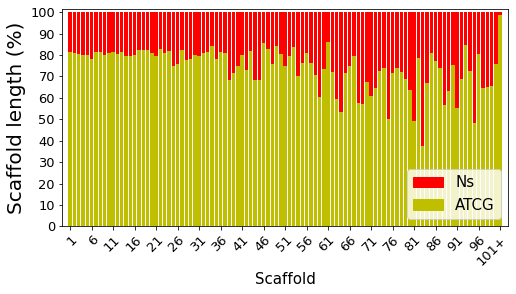

In [31]:
#Plot results   

plt.figure(figsize=(8,4))
#data_for_barplot.plot(x="scaffold_id",kind="bar",stacked=True,figsize=(10, 8))

plt.bar(NsbyScaffphaw5_0["scaffold_id"],NsbyScaffphaw5_0["Seq_perc"], color='y')
plt.bar(NsbyScaffphaw5_0["scaffold_id"],NsbyScaffphaw5_0["N_perc"], color='r',bottom=NsbyScaffphaw5_0["Seq_perc"])

scaffold_order = np.arange(1, 102)

plt.xticks(NsbyScaffphaw5_0["scaffold_id"],list(np.append(scaffold_order[:-1],'101+')),rotation=45,fontsize =13,
           horizontalalignment="right",rotation_mode='anchor')
#plt.xticks(data_for_barplot["scaffold_id"][100:101],"101+",rotation=45, horizontalalignment="right",rotation_mode='anchor')
plt.yticks(list(range(0,200,10)),rotation=0,fontsize =13, horizontalalignment="right",rotation_mode='anchor')
plt.locator_params(axis='x', nbins=21)
plt.ylabel("Scaffold length (%)",fontsize=20)
plt.xlabel('Scaffold',fontsize=15)
colors = {'Ns':'red', 'ATCG':'y'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc=4,prop={'size': 15})
plt.margins(x=0.015,y=0.015, tight=True)

#plt.savefig("NsbyScaff_phaw5.0.jpg", dpi=300,bbox_inches = 'tight')
plt.show()